# K Nearest Neighbors

![LOML](https://media.geeksforgeeks.org/wp-content/uploads/20200616145419/Untitled2781.png)
love of my life

KNN is definitely my favorite algorithm out of all that we have learned so far! K-Nearest Neighbors is simple, but strong. It uses the idea of proximity to make predictions about individual data points, and it stands as one of the most popular classifiers in ML today.

KNN can be used for both classification and regression problems, but the main idea remains the same- we choose the k closet training data points from the training data set. So for a new datapoint, KNN chooses these k nearest neighbors, and this datapoint is classified by the plurality of its neighbors. That is, new data points are classified by the "majority" of the label of its neighbors. k is a user-chosen value, and the optimal value of k is subjective to the test. 

A commonly used distance metric to find the closest neighbors is the Euclidian distance, but other distance metrics can be used as well. Traditional Euclidian distance is calculated through this equation:

$$
distance = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + ...+ (x_n - y_n)^2}
$$


Other distances that can be used include

* Hamming Distance- find the number of differences between 2 binary strings
* Manhattan Distance- for data points in n-dimensional space: $|x_1 - y_1|+ |x_2-y_2| +...+|x_n-y_n|$


A breakdown of the KNN algorithm looks like this:
1. Choose a value of k and calculate all distances between the query data point and the training data points using a chosen distance metric. 
2. Select the k nearest neighbors (so closer distances are selected) and get the labels of these neighbors
3. For classification problems, the label predicted for the query datapoint is the mode of the k labels. For regression, it's the mean of the k labels. k is usually odd for majority vote purposes, but too small or too large of a value can compromise accuracy.


I love KNN for its simplicity and flexibility, but it can definitely struggle with large datapoints. Another interesting thing to keep in mind is that there's no perfect value for k.


# Application

[College GPA Dataset Source](https://www.key2stats.com/data-set/view/1008)

The First Year GPA for College Students dataset is a collection of 219 observations on 11 of the following variables:

1. GPA- First-year college GPA on a 0.0 to 4.0 scale
2. HSGPA- High school GPA on a 0.0 to 4.0 scale
3. SATV-Verbal/critical reading SAT score
4. SATM- Math SAT score
5. Sex- 1= male, 0= female
6. HU- Number of credit hours earned in humanities courses in high school
7. SS- Number of credit hours earned in social science courses in high school
8. FirstGen- 1= student is the first in her or his family to attend college, 0=otherwise
9. White- 1= white students, 0= others
10. CollegeBound- 1=attended a high school where >=50% students intended to go on to college, 0=otherwise

In this notebook, we will be using high school gpa and total SAT scores to predict whether or not a student will get above or below a 3.5 first year college GPA. Then, we will do a regression task to predict a student's first year college GPA generally based on these stats.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


sns.set_theme()

df = pd.read_csv(r"C:\Users\faith\inde 577\INDE577\577repo\Supervised Learning\Datasets\First_Year_GPA_for_College_Students_1008_61.csv")

#We create a NEW dataframe which calculates each student's cumulative SAT score from both math and reading sections
df['SAT'] = df['SATV'] + df['SATM']
print(df['SAT'])
df.columns

high_gpa = df[df['GPA'] >= 3.5]
low_gpa = df[df['GPA'] < 3.5]


0      1450
1      1460
2      1210
3      1440
4      1220
       ... 
214    1390
215    1420
216    1340
217    1300
218    1320
Name: SAT, Length: 219, dtype: int64


Let's visualize the data see if there is any pattern in it. 

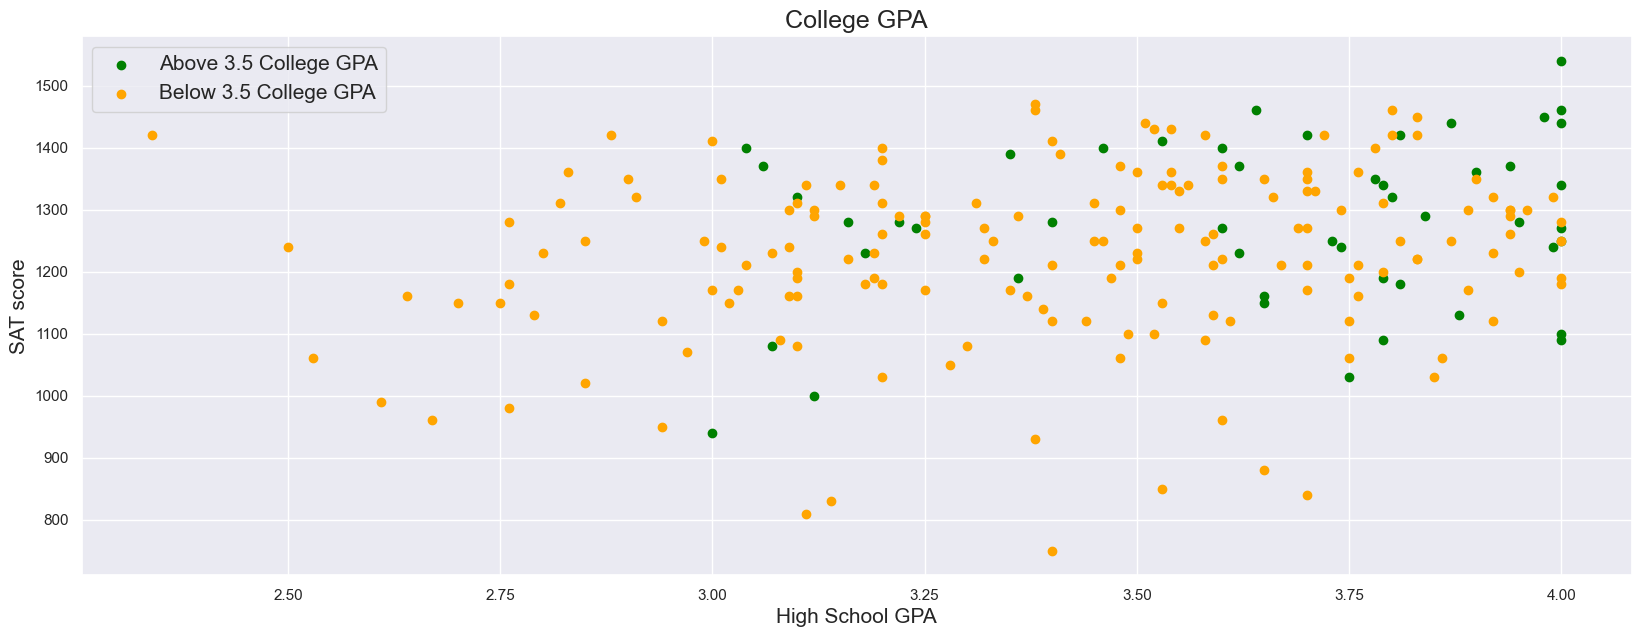

In [4]:
# Plotting
plt.figure(figsize=(20, 7))

plt.scatter(high_gpa['HSGPA'], 
            high_gpa['SAT'], 
            color='green', 
            label='Above 3.5 College GPA')

plt.scatter(low_gpa['HSGPA'], 
            low_gpa['SAT'], 
            color='orange', 
            label='Below 3.5 College GPA')

# Labels and title
plt.xlabel("High School GPA", fontsize=15)
plt.ylabel("SAT score", fontsize=15)
plt.legend(fontsize=15)
plt.title("College GPA", fontsize=18)

# Show plot
plt.show()

A somewhat generally linear relationship seems to exist. Let's try our best with classification- I hypothesize that it will predict the tiny cluster at the top and bottom fairly well, but let's see how well KNN does for the middle parts of the data.

In [5]:
df = df.dropna()
df.head()

X = df[['HSGPA', 'SAT']]

#We give new labels to the college GPAs. Instead of the raw numbers, we just determine if its above or below 3.5
y= df['college_GPA_label'] = df['GPA'].apply(lambda x: '>=3.5' if x >= 3.5 else '<3.5')

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_test)

     HSGPA   SAT
154   3.00  1410
93    2.94  1120
216   3.15  1340
217   3.09  1300
15    3.55  1270
..     ...   ...
5     3.25  1170
138   2.76   980
56    3.75  1120
113   3.33  1250
152   3.10  1320

[66 rows x 2 columns]


Next, we use the built in KNeighborsClassifier module form scikit-learn and choose a k value of 5.

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)


Let's visualize how well KNN did.

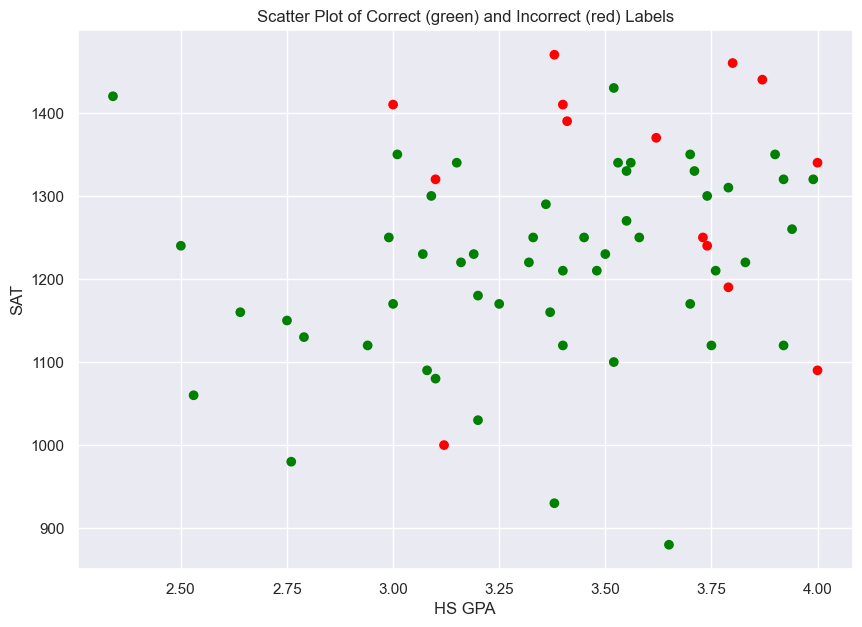

In [7]:
correct= y_pred_test == y_test

colors = np.where(correct, 'green', 'red')


plt.figure(figsize=(10, 7))
plt.scatter(X_test.HSGPA.values, X_test.SAT.values, c= colors)

plt.xlabel('HS GPA')
plt.ylabel('SAT')
plt.title('Scatter Plot of Correct (green) and Incorrect (red) Labels')
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
accuracy = accuracy_score(y_pred_test, y_test)

# Print accuracy
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred_test)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7878787878787878
Confusion Matrix:
[[52  5]
 [ 9  0]]

Classification Report:
              precision    recall  f1-score   support

        <3.5       0.85      0.91      0.88        57
       >=3.5       0.00      0.00      0.00         9

    accuracy                           0.79        66
   macro avg       0.43      0.46      0.44        66
weighted avg       0.74      0.79      0.76        66



Not bad! We have a few false positives and false negatives, but it's an overall pretty decent predictor with almost 80% accuracy. I think this less accurate accuracy score and scatter plot are pretty good indicators to the fact that SAT and high school GPA are definitely not everything for predicting college succcess :)

## Using KNN for Regression

Next, let's try to use KNN to predict SAT score based on one's high school GPA.

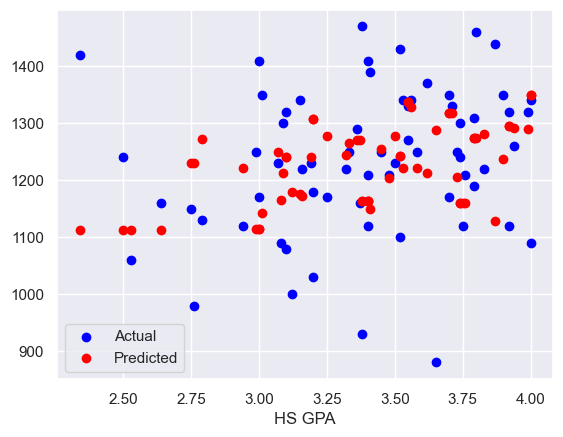

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X contains high school GPA and y contains SAT scores
df['SAT'] = df['SATV'] + df['SATM']

Xreg = df['HSGPA'].values.reshape(-1, 1)
yreg= df['SAT']


Xtrain, Xtest, ytrain, ytest = train_test_split(Xreg, yreg, test_size=0.3, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)

plt.scatter(Xtest, ytest, color='blue', label='Actual')
plt.scatter(Xtest, ypred, color='red', label='Predicted')
plt.xlabel("HS GPA")
plt.legend()



Nice! The predicted values follow the same general upward trend, which is good.

In [11]:

# Calculate Mean Squared Error (MSE) as a measure of performance
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error:", mse)

r2 = r2_score(ytest, ypred)
print("R^2:", r2)

Mean Squared Error: 21922.363636363636
R^2: -0.35700717199865295


This negative R2 value indicates that there may be a few issues with the hyperparameters in our model. KNN may be too simplistic to capture the underlying relationship and the fact that the data has a lot of noise makes it difficult for KNN to capture the variation in the target variable super well. Still, I think it did pretty great for its simplicity.